In [72]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go


In [58]:
polymer_viscocity = list([32, 40, 46, 67,73, 107])
no_polymer_viscocity = list([370, 530, 688, 740, 830, 780])
combined_viscocity = polymer_viscocity + no_polymer_viscocity

# Calcular la viscosidad promedio
mean_viscocity = [(p + n) / 2 for p, n in zip(polymer_viscocity, no_polymer_viscocity)]

In [59]:
df = pd.DataFrame(
{
  'salt': [1,1.2,1.4,1.6,1.8,2],
  'polymer_viscocity': polymer_viscocity, 
  'combined_viscocity' : mean_viscocity,
  'no_polymer_viscocity': no_polymer_viscocity
})

In [60]:
df.head(1)

,salt,polymer_viscocity,combined_viscocity,no_polymer_viscocity
0,1.0,32,201.0,370


<AxesSubplot: xlabel='salt', ylabel='no_polymer_viscocity'>

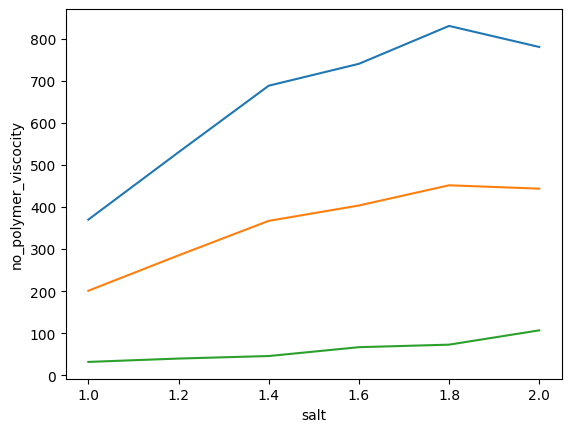

In [61]:
sns.lineplot(data=df, x='salt', y='no_polymer_viscocity')
sns.lineplot(data=df, x='salt', y='combined_viscocity')
sns.lineplot(data=df, x='salt', y='polymer_viscocity')

In [68]:
polymer_viscocity = [32, 40, 46, 67, 73, 107]
no_polymer_viscocity = [370, 530, 688, 740, 830, 780]
salt_concentration = [1, 1.2, 1.4, 1.6, 1.8, 2]

# Crear DataFrame con datos
df = pd.DataFrame({
    'salt': [1, 1.2, 1.4, 1.6, 1.8, 2, 1, 1.2, 1.4, 1.6, 1.8, 2],
    'polymer_concentration': [1] * 6 + [0] * 6,
    'polymer_viscocity': [32, 40, 46, 67, 73, 107, 370, 530, 688, 740, 830, 780], 
})

# Modelar viscosidad en función de la concentración de sal y la concentración de polímero
X = df[['salt', 'polymer_concentration']]
y = df['polymer_viscocity']

In [74]:
model = LinearRegression()
model.fit(X, y)

# Predecir viscosidad usando el modelo
X_pred = np.column_stack((salt_range, [fixed_polymer_concentration] * len(salt_range)))
y_pred = model.predict(X_pred)

# Imprimir los coeficientes del modelo
print(f'Intercept: {model.intercept_}')
print(f'Coefficients: {model.coef_}')

Intercept: 281.6547619047619
Coefficients: [ 249.78571429 -595.5       ]


/usr/local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [71]:
salt_range = np.linspace(df['salt'].min(), df['salt'].max(), 100)
polymer_range = np.linspace(df['polymer_concentration'].min(), df['polymer_concentration'].max(), 100)
salt_grid, polymer_grid = np.meshgrid(salt_range, polymer_range)
X_grid = np.c_[salt_grid.ravel(), polymer_grid.ravel()]

# Predecir viscosidad
y_pred = model.predict(X_grid)
y_pred_grid = y_pred.reshape(salt_grid.shape)

# Crear gráfica 3D con Plotly
fig = go.Figure()

# Superficie de la viscosidad predicha
fig.add_trace(go.Surface(
    z=y_pred_grid,
    x=salt_grid,
    y=polymer_grid,
    colorscale='Viridis',
    colorbar=dict(title='Viscosity'),
    name='Regression Surface'
))

# Datos originales
fig.add_trace(go.Scatter3d(
    x=df['salt'],
    y=df['polymer_concentration'],
    z=df['polymer_viscocity'],
    mode='markers',
    marker=dict(size=5, color='red'),
    name='Data Points'
))

fig.update_layout(
    scene=dict(
        xaxis_title='Salt Concentration',
        yaxis_title='Polymer Concentration',
        zaxis_title='Viscosity'
    ),
    title='Viscosity vs. Salt and Polymer Concentration'
)

fig.show()

/usr/local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

